<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/APIs_y_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yahoo Finance

La API de Yahoo Finance no requiere autenticación. Es simplemente una URL ordenada.

In [ ]:
headers = requests.utils.default_headers()
headers.update({
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.55 Safari/537.36',
})

In [ ]:
url = 'https://query1.finance.yahoo.com/v8/finance/chart/MSFT?start=2020-09-26&end=2020-09-27&interval=1h'
response = requests.get(url, headers=headers)

In [ ]:
response.json()['chart']['result'][0]['timestamp']

[1715779800, 1715783400, 1715787000, 1715790600, 1715792018]

In [ ]:
def get_ticker(ticker, start, end, interval):
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/'
    return requests.get(f'{url}{ticker}?start={start}&end={end}&interval={interval}', headers=headers).json()

In [ ]:
get_ticker('APPL', start='2020-09-27', end='2020-09-28', interval='1m')

{'chart': {'result': [{'meta': {'currency': None,
     'symbol': 'APPL',
     'exchangeName': 'YHD',
     'fullExchangeName': 'YHD',
     'instrumentType': 'MUTUALFUND',
     'firstTradeDate': None,
     'regularMarketTime': 1561759658,
     'hasPrePostMarketData': False,
     'gmtoffset': -14400,
     'timezone': 'EDT',
     'exchangeTimezoneName': 'America/New_York',
     'priceHint': 2,
     'currentTradingPeriod': {'pre': {'timezone': 'EDT',
       'start': 1715760000,
       'end': 1715779800,
       'gmtoffset': -14400},
      'regular': {'timezone': 'EDT',
       'start': 1715779800,
       'end': 1715803200,
       'gmtoffset': -14400},
      'post': {'timezone': 'EDT',
       'start': 1715803200,
       'end': 1715817600,
       'gmtoffset': -14400}},
     'dataGranularity': '1d',
     'range': '1d',
     'validRanges': ['1mo',
      '3mo',
      '6mo',
      'ytd',
      '1y',
      '2y',
      '5y',
      '10y',
      'max']},
    'indicators': {'quote': [{}], 'adjclose': [{

# Datos.gob.ar

La API de datos.gob.ar tampoco requiere autenticación

In [ ]:
import requests
import urllib.parse
API_BASE_URL = "http://apis.datos.gob.ar/series/api/"
def get_api_call(ids, **kwargs):
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))
api_call = get_api_call(["116.4_TCRZE_2015_D_36_4"], start_date="2020-05")
print(api_call)

http://apis.datos.gob.ar/series/api/series?start_date=2020-05&ids=116.4_TCRZE_2015_D_36_4


In [ ]:
requests.get(api_call).json()

{'data': [['2020-05-01', 112.36506306848386],
  ['2020-05-02', 112.30442676552732],
  ['2020-05-03', 112.2438231841404],
  ['2020-05-04', 111.428671869791],
  ['2020-05-05', 111.29024455338276],
  ['2020-05-06', 110.52431588155298],
  ['2020-05-07', 109.88193797867628],
  ['2020-05-08', 110.49675896709935],
  ['2020-05-09', 110.43713086945516],
  ['2020-05-10', 110.3775349493161],
  ['2020-05-11', 110.01475199427584],
  ['2020-05-12', 110.1607040722989],
  ['2020-05-13', 109.64479925245637],
  ['2020-05-14', 109.82057497210457],
  ['2020-05-15', 110.15377451455606],
  ['2020-05-16', 110.0943315038829],
  ['2020-05-17', 110.03492057083515],
  ['2020-05-18', 111.1121971294605],
  ['2020-05-19', 111.22457738509117],
  ['2020-05-20', 111.74507762108044],
  ['2020-05-21', 112.43767891939014],
  ['2020-05-22', 112.51409246296308],
  ['2020-05-23', 112.4533757382877],
  ['2020-05-24', 112.39269177858044],
  ['2020-05-25', 112.33204056616016],
  ['2020-05-26', 113.90815216192904],
  ['2020-05-

# Kaggle

En cambio, la API de Kaggle requiere un usuario y autenticarse con las keys del usuario. https://github.com/Kaggle/kaggle-api

In [ ]:
import pandas as pd
import numpy as np
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c unimelb


import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

  0% 0.00/451k [00:00<?, ?B/s]
100% 451k/451k [00:00<00:00, 64.6MB/s]


In [ ]:
train = pd.read_csv('/content/unimelb_training.csv')
test = pd.read_csv('/content/unimelb_test.csv')

<ipython-input-2-dc217d3e4660>:1: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/unimelb_training.csv')


In [ ]:
train.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,...,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,59C,10A,A,16/11/05,260500.0,34.0,280000.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Grant.Status', ylabel='count'>

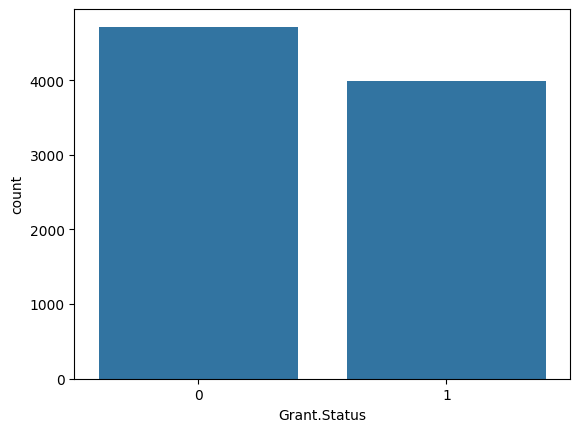

In [ ]:
import seaborn as sns
sns.countplot(data=train, x="Grant.Status")

# Alphacast

La API de alphacast tiene ciertas prestaciones para las cuentras gratuitas y otras prestaciones para las cuentas de pago.

In [ ]:
api_token = {
    'username': 'leocaravaggio',
    'key': userdata.get('ALPHACAST')}

ipc = requests.get('https://api.alphacast.io/datasets/5515/data?apiKey='+api_token['key']+'&$format=csv')

In [ ]:
import io
pd.read_csv(io.BytesIO(ipc.content), delimiter = ',')

,Date,country,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Bienes,Bienes y servicios varios,Comunicación,Educación,Equipamiento y mantenimiento del hogar,Estacional,...,Bebidas alcohólicas y tabaco - constant_prices,Alimentos y bebidas no alcohólicas - current_prices_yoy,Alimentos y bebidas no alcohólicas - current_prices_mom,Alimentos y bebidas no alcohólicas - constant_prices,Equipamiento y mantenimiento del hogar - current_prices_yoy,Equipamiento y mantenimiento del hogar - current_prices_mom,Equipamiento y mantenimiento del hogar - constant_prices,"Vivienda, agua, electricidad y otros combustibles - current_prices_yoy","Vivienda, agua, electricidad y otros combustibles - current_prices_mom","Vivienda, agua, electricidad y otros combustibles - constant_prices"
0,2016-12-01,Argentina,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,5796.575263,NaN,NaN,5796.575263,NaN,NaN,5796.575263,NaN,NaN,5796.575263
1,2017-01-01,Argentina,101.3024,100.9250,101.1903,101.9345,103.0516,100.7952,100.8773,101.6969,...,5758.863764,NaN,1.302400,5780.398519,NaN,0.877300,5756.141963,NaN,1.478400,5790.441224
2,2017-02-01,Argentina,103.1605,105.2395,102.7002,103.7951,107.2514,103.9808,101.3278,102.3345,...,5883.429496,NaN,1.834211,5767.202700,NaN,0.446582,5664.745341,NaN,5.442538,5981.928771
3,2017-03-01,Argentina,106.0143,107.2901,104.9817,105.6633,110.6933,115.3409,102.1787,104.7868,...,5858.965626,NaN,2.766369,5789.295932,NaN,0.839750,5579.839062,NaN,3.593317,6053.164844
4,2017-04-01,Argentina,108.3515,109.8338,107.4919,107.5442,118.2686,118.6783,103.3147,108.1867,...,5842.701377,NaN,2.204608,5763.849182,NaN,1.111778,5495.912369,NaN,5.922164,6245.766265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2023-12-01,Argentina,4173.6759,2656.6774,4091.9271,3029.3357,2398.1411,2157.4419,3810.0606,3942.5343,...,4384.050117,251.341642,29.682903,6887.401654,231.733053,30.678790,6287.363539,149.017305,13.816559,3534.433053
85,2024-01-01,Argentina,5024.9656,3215.0859,4956.9526,4373.2672,3000.0919,2176.0052,4660.7816,4581.5309,...,4399.283623,296.184899,20.396641,6875.787944,284.968207,22.328280,6377.465735,162.801087,14.008065,3341.242720
86,2024-02-01,Argentina,5622.8372,3783.2760,5545.8270,5098.6735,3741.4942,2392.1354,5142.1336,4979.8267,...,4573.102964,303.823442,11.898024,6796.705677,304.288619,10.327710,6215.646547,201.460027,20.219923,3548.444715
87,2024-03-01,Argentina,6216.0451,4248.8502,6086.8421,5586.4345,4338.0607,3653.0356,5400.7512,5534.7104,...,4622.749018,308.269787,10.549975,6763.057069,301.318490,5.029383,5876.017306,220.531666,13.253795,3617.235194


# Scraper

In [ ]:
from bs4 import BeautifulSoup
sitecoto='https://www.cotodigital3.com.ar/sitios/cdigi/producto/-el-principito/_/A-00521660-00521660-200'
r = requests.get(sitecoto, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
soup = BeautifulSoup(r.content, 'html.parser')
b=soup.find("h1", {"class": "product_page"}).text.strip() + ";"
b+=soup.find("span", {"class": "atg_store_newPrice"}).text.strip()
print(b)

El Principito;$9.600,00


# Scraping con Selenium

In [1]:
!pip install -U seleniumbase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.1/563.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.

In [8]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!sudo dpkg -i google-chrome-stable_current_amd64.deb
!sudo apt-get install -f  # Para resolver dependencias

--2024-08-23 19:15:26--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 142.250.145.93, 142.250.145.190, 142.250.145.136, ...
Connecting to dl.google.com (dl.google.com)|142.250.145.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110726136 (106M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 105.60M   325MB/s    in 0.3s    

2024-08-23 19:15:27 (325 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [110726136/110726136]

Selecting previously unselected package google-chrome-stable.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (128.0.6613.84-1) ...
dpkg: dependency problems prevent configuration of google-chrome-stable:
 google-chrome-stable depends on libvulkan1; however:
  Packag

In [9]:
from seleniumbase import Driver

driver = Driver(uc=True)
driver.get("https://www.argentina.gob.ar/descarga-constancia-cuil")


*** chromedriver to download = 128.0.6613.84 (Latest Stable) 

https://storage.googleapis.com/chrome-for-testing-public/128.0.6613.84/linux64/chromedriver-linux64.zip ...
Download Complete!

Extracting ['chromedriver'] from chromedriver-linux64.zip ...
Unzip Complete!

The file [chromedriver] was saved to:
/usr/local/lib/python3.10/dist-packages/seleniumbase/drivers/chromedriver

Making [chromedriver 128.0.6613.84] executable ...
[chromedriver 128.0.6613.84] is now ready for use!



In [10]:
from selenium.webdriver.common.by import By
input_element=driver.find_element(By.XPATH, '//*[@id="edit-num-doc"]')
input_element.send_keys("12345678")

input_element=driver.find_element(By.XPATH, '//*[@id="edit-nombre"]')
input_element.send_keys("Leonardo")

input_element=driver.find_element(By.XPATH, '//*[@id="edit-apellido"]')
input_element.send_keys("Caravaggio")

input_element=driver.find_element(By.XPATH, '//*[@id="edit-sexo-m"]')
input_element.click()

input_element=driver.find_element(By.XPATH, '//*[@id="edit-fecha-nacimiento-datepicker-popup-0"]')
input_element.send_keys("01/01/1980")

input_element=driver.find_element(By.XPATH, '//*[@id="edit-submit"]')
input_element.click()

In [11]:
screenshot_name = "Screenshot.png"
driver.save_screenshot(screenshot_name)
print("\nScreenshot saved to: %s" % screenshot_name)
driver.quit()


Screenshot saved to: Screenshot.png
